In [2]:
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
import numpy as np
from scipy.spatial import distance

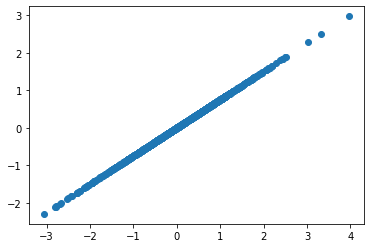

In [3]:
xs = []
fxs = []
# Open the file for reading
with open("linear_function_data.txt", "r") as file:
    # Loop over each line in the file
    for line in file:
        # Split the line into columns
        col1, col2 = line.split()
        # Convert the columns to numbers
        col1 = float(col1)
        col2 = float(col2)

        # Add the columns to the lists
        xs.append(col1)
        fxs.append(col2)

# Plot the data
plt.plot(xs, fxs, "o")
xs = np.array(xs)
fxs = np.array(fxs)
xs_1dim = xs
xs = np.expand_dims(xs, 1)
fxs = np.expand_dims(fxs, 1)

[[0.75000024]]


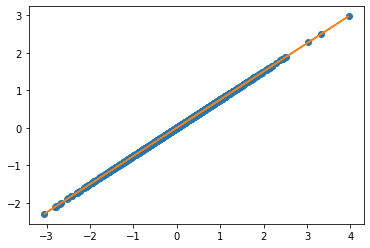

In [4]:

# Fit the model to the data
params, residuals, rank, s =lstsq(a=xs, b=fxs,cond=0.1)


# Print the model parameter
print(params)


# Plot the model vs the data
plt.plot(xs, fxs, "o")
plt.plot(xs, params[0] * xs )
plt.show()



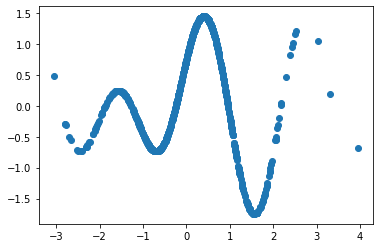

In [5]:
xs = []
fxs = []
# Open the file for reading
with open("nonlinear_function_data.txt", "r") as file:
    # Loop over each line in the file
    for line in file:
        # Split the line into columns
        col1, col2 = line.split()
        # Convert the columns to numbers
        col1 = float(col1)
        col2 = float(col2)

        # Add the columns to the lists
        xs.append(col1)
        fxs.append(col2)

# Plot the data
plt.plot(xs, fxs, "o")
xs = np.array(xs)
fxs = np.array(fxs)
xs = np.expand_dims(xs, 1)
fxs = np.expand_dims(fxs, 1)

[[0.03321036]]


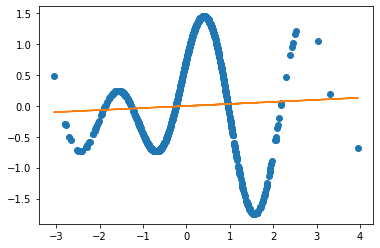

In [6]:
# Fit the model to the data
params, residuals, rank, s =lstsq(a=xs, b=fxs,cond = 0.1)


# Print the model parameter
print(params)


# Plot the model vs the data
plt.plot(xs, fxs, "o")
plt.plot(xs, params[0] * xs )
plt.show()

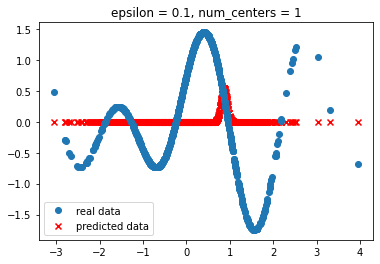

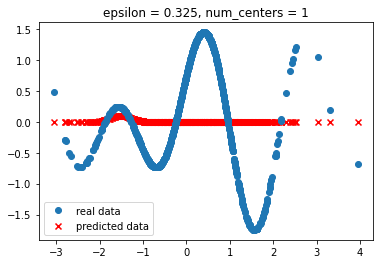

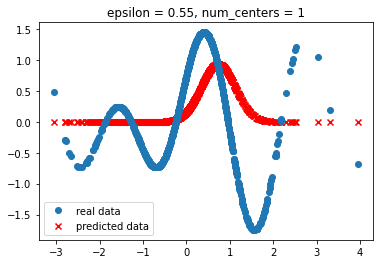

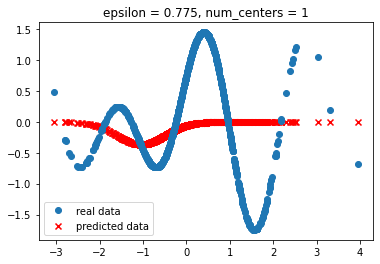

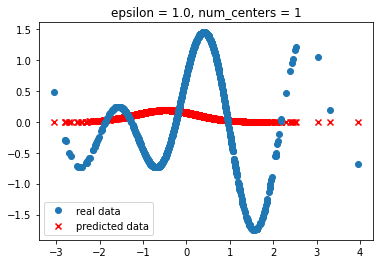

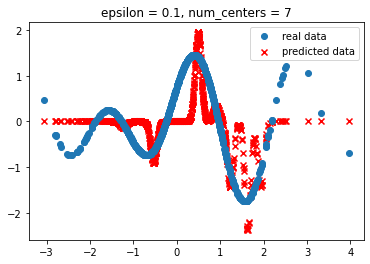

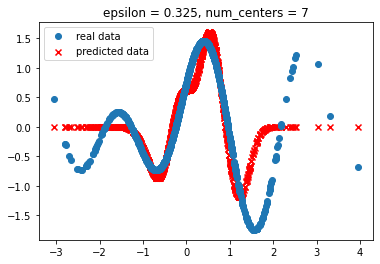

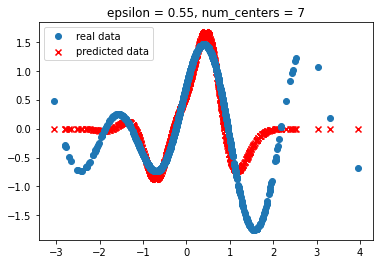

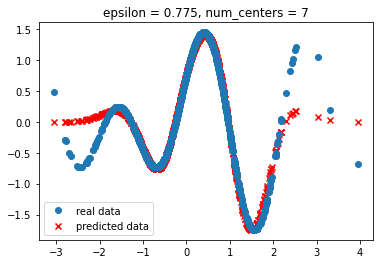

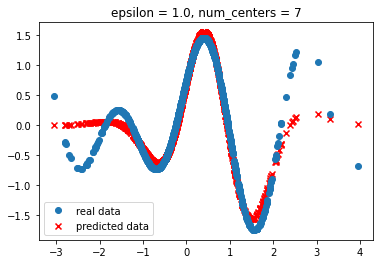

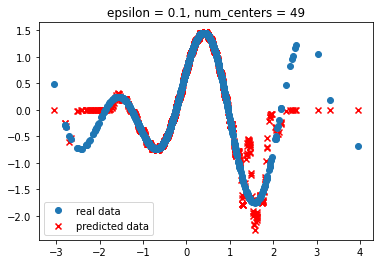

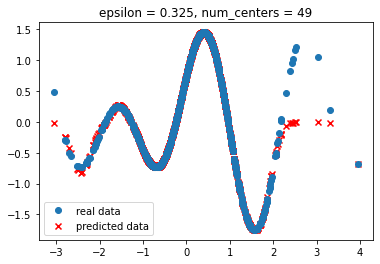

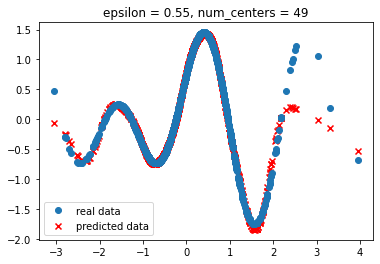

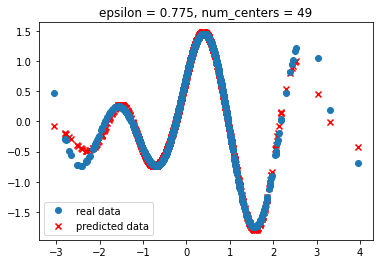

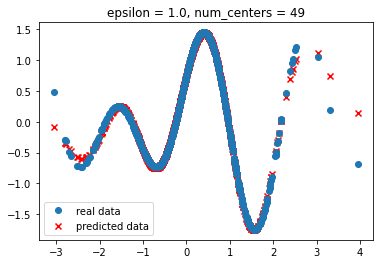

In [38]:
def rbf(x, xl, epsilon):
    return np.exp(-distance.cdist(x,xl) ** 2 / epsilon ** 2)


## Fit this data usign radial basis functions
# Define the epsilon value
epsilons = np.linspace(0.1, 1, 5)

# Define the number of centers
num_centers_s = [1,7,49]

# Define the centers

for num_centers in num_centers_s:
    for epsilon in epsilons:
        centers = xs[np.random.choice(range(xs.shape[0]), replace=False, size=num_centers)]

        # Define the design matrix
        phi = rbf(xs, centers, epsilon)

        # Fit the model to the data
        params, residuals, rank, s =lstsq(a=phi, b=fxs,cond = 0.0001)

        # Plot the model vs the data
        predicted = np.dot(phi, params)
        plt.plot(xs, fxs, "o", label = "real data")
        plt.scatter(xs, np.dot(phi, params), marker = "x",c="r", label = "predicted data")
        plt.legend()
        plt.title("epsilon = {}, num_centers = {}".format(epsilon, num_centers))
        plt.show()


